## Task 3 
## Feature Engineering / Modelling

#### - Sub-task 1: 

- Think through what key drivers of churn could be for our client.

- Build the features in order to get ready to model.


## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import pandas as pd
import seaborn as sns
import datetime
import pickle
import warnings
warnings.filterwarnings("ignore")

sns.set(color_codes=True)
pd.set_option('display.max_columns',50)

## Load data

In [2]:
date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
train = pd.read_csv('train_clean.csv',parse_dates=date_cols)
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [3]:
history = pd.read_csv('history_clean.csv',parse_dates=['price_date'])
history.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Feature engineering

First we need to do the Feature Selection We will create the average consumption of the year as one new feature


In [4]:
mean_year=history.groupby(['id']).mean().reset_index()

In [5]:
mean_6m=history[history['price_date']>'2015-06-01'].groupby(['id']).mean().reset_index()

In [6]:
mean_3m=history[history['price_date']>'2015-10-01'].groupby(['id']).mean().reset_index()

In [7]:
#Combine the mean year in a single dataframe
mean_year=mean_year.rename(index=str,columns={'price_p1_var':'mean_year_price_p1_var',
                                              'price_p2_var':'mean_year_price_p2_var',
                                              'price_p3_var':'mean_year_price_p3_var',
                                              'price_p1_fix':'mean_year_price_p1_fix',
                                              'price_p2_fix':'mean_year_price_p2_fix',
                                              'price_p3_fix':'mean_year_price_p3_fix',})
mean_year['mean_year_price_p1']=mean_year['mean_year_price_p1_var']+mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2']=mean_year['mean_year_price_p2_var']+mean_year['mean_year_price_p2_fix']
mean_year['mean_year_price_p3']=mean_year['mean_year_price_p3_var']+mean_year['mean_year_price_p3_fix']

In [8]:
mean_6m=mean_6m.rename(index=str,columns={'price_p1_var':'mean_6m_price_p1_var',
                                              'price_p2_var':'mean_6m_price_p2_var',
                                              'price_p3_var':'mean_6m_price_p3_var',
                                              'price_p1_fix':'mean_6m_price_p1_fix',
                                              'price_p2_fix':'mean_6m_price_p2_fix',
                                              'price_p3_fix':'mean_6m_price_p3_fix',})
mean_6m['mean_6m_price_p1']=mean_6m['mean_6m_price_p1_var']+mean_6m['mean_6m_price_p1_fix']
mean_6m['mean_6m_price_p2']=mean_6m['mean_6m_price_p2_var']+mean_6m['mean_6m_price_p2_fix']
mean_6m['mean_6m_price_p3']=mean_6m['mean_6m_price_p3_var']+mean_6m['mean_6m_price_p3_fix']

In [9]:
mean_3m=mean_3m.rename(index=str,columns={'price_p1_var':'mean_3m_price_p1_var',
                                              'price_p2_var':'mean_3m_price_p2_var',
                                              'price_p3_var':'mean_3m_price_p3_var',
                                              'price_p1_fix':'mean_3m_price_p1_fix',
                                              'price_p2_fix':'mean_3m_price_p2_fix',
                                              'price_p3_fix':'mean_3m_price_p3_fix',})
mean_3m['mean_3m_price_p1']=mean_3m['mean_3m_price_p1_var']+mean_3m['mean_3m_price_p1_fix']
mean_3m['mean_3m_price_p2']=mean_3m['mean_3m_price_p2_var']+mean_3m['mean_3m_price_p2_fix']
mean_3m['mean_3m_price_p3']=mean_3m['mean_3m_price_p3_var']+mean_3m['mean_3m_price_p3_fix']

In [10]:
history_new = pd.merge(mean_year,mean_6m, on='id',how='left')
history_new = pd.merge(mean_year,mean_3m, on='id',how='left')
history_new.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


## Date-time

In [11]:
#Extract contract duration 
#we will define the duration=date_end-date_activ
train['contract_duration']=((train['date_end']-train['date_activ'])/ np.timedelta64(1,'M')).astype(int)
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72


In [12]:
#set the reference time to be 2016-01-01
#write a finction to caculate the month difference between datetime features
def calculatemonth(referencetime,dataframe,column):
    time_diff=referencetime-dataframe[column]
    months=(time_diff/np.timedelta64(1,'M')).astype(int)
    return months

In [13]:
referencetime=pd.to_datetime('2016-01-01')

In [14]:
train['activ_diff']=calculatemonth(referencetime,train,'date_activ')
train['end_diff']=calculatemonth(referencetime,train,'date_end')
train['modif_diff']=calculatemonth(referencetime,train,'date_modif_prod')
train['renewal_diff']=calculatemonth(referencetime,train,'date_renewal')
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47,37,-10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36,30,-5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84,76,-7,76,4
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72,68,-3,68,8
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72,69,-2,69,9


In [15]:
#Remove the date columns 
train.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],axis=1,inplace=True)

In [16]:
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47,37,-10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36,30,-5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84,76,-7,76,4
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72,68,-3,68,8
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72,69,-2,69,9


## Categorical Data

## Binary encoding

In [17]:
#For the column has_gas,replace t for 1 and f for 0
train['has_gas']=train['has_gas'].replace(['t','f'],[1,0])

## one-hot encoding

In [18]:
train['channel_sales']=train['channel_sales'].fillna('null_values_channel')
train['channel_sales']=train['channel_sales'].apply(lambda x:x[:4])
categories_channel=pd.get_dummies(train[['channel_sales']])
categories_channel.drop(columns=['channel_sales_null'],inplace=True)
categories_channel.head()

,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0


In [19]:
#for the column origin_up, first fill the null value 
train['origin_up']=train['origin_up'].fillna('null_values_origin')

In [20]:
train['origin_up']=train['origin_up'].apply(lambda x:x[:4])
categories_origin= pd.get_dummies(train[['origin_up']])
categories_origin.drop(columns=['origin_up_null'],inplace=True)
categories_origin.head()

,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [21]:
#Use the common index to merge 
train=pd.merge(train,categories_channel,left_index=True,right_index=True)
train=pd.merge(train,categories_origin,left_index=True,right_index=True)

In [22]:
train=train.drop(['channel_sales','origin_up'],axis=1)
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,13.800,0,84,76,-7,76,4,0,0,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,1,0,0,0


# Numerical Data

## Distribution transformation

From the previous EDA we can see that some features are highly skewed, we need to transform the distribution to normal-like distribution


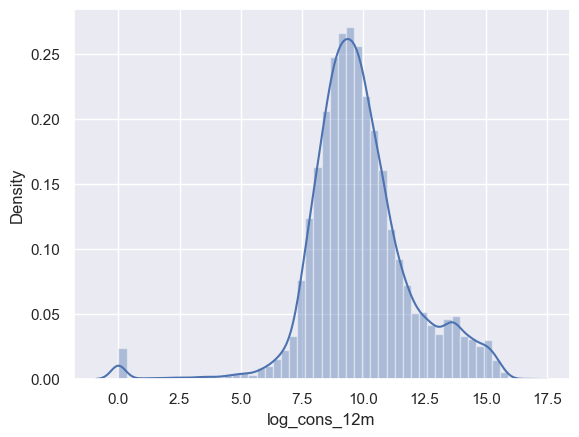

In [23]:
#First for the cons_12, remove the negative values and apply a log tranformation
train.loc[train.cons_12m<0,'cons_12m']=np.nan
train['cons_12m']=train['cons_12m'].dropna()
train['log_cons_12m']=train['cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_12m']);

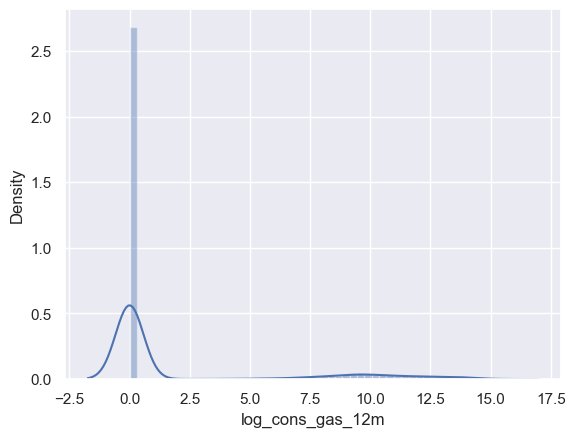

In [24]:
train.loc[train.cons_gas_12m<0,'cons_gas_12m']=np.nan
train['cons_gas_12m']=train['cons_gas_12m'].dropna()
train['log_cons_gas_12m']=train['cons_gas_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_gas_12m']);

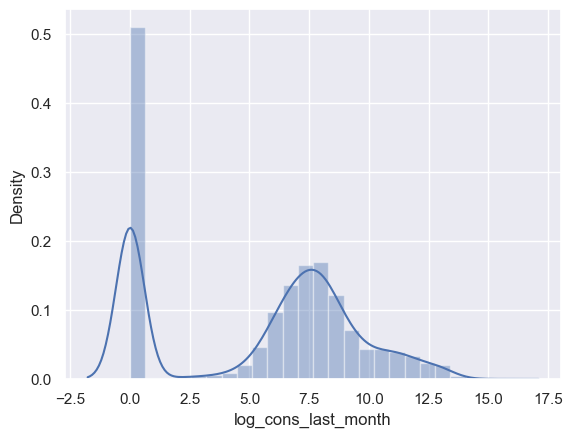

In [25]:
train.loc[train.cons_last_month<0,'cons_last_month']=np.nan
train['cons_last_month']=train['cons_last_month'].dropna()
train['log_cons_last_month']=train['cons_last_month'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_last_month']);

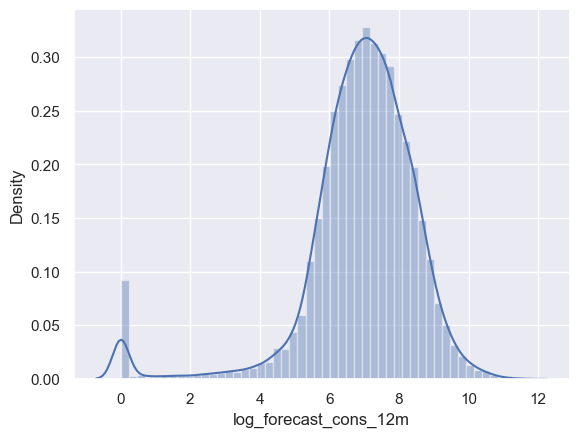

In [26]:
train.loc[train.forecast_cons_12m<0,'forecast_cons_12m']=np.nan
train['forecast_cons_12m']=train['forecast_cons_12m'].dropna()
train['log_forecast_cons_12m']=train['forecast_cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_cons_12m']);

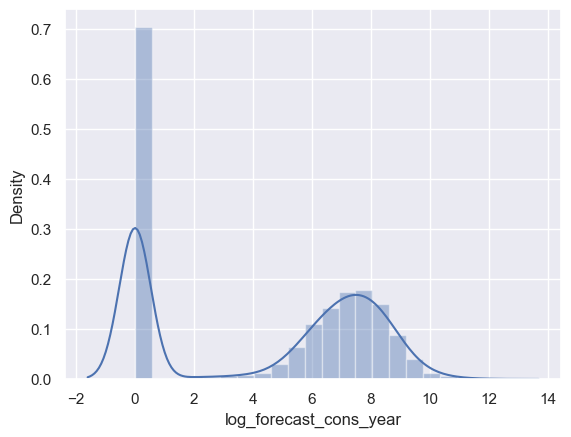

In [27]:
train.loc[train.forecast_cons_year<0,'forecast_cons_year']=np.nan
train['forecast_cons_year']=train['forecast_cons_year'].dropna()
train['log_forecast_cons_year']=train['forecast_cons_year'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_cons_year']);

<AxesSubplot:xlabel='log_forecast_meter_rent_12m', ylabel='Density'>

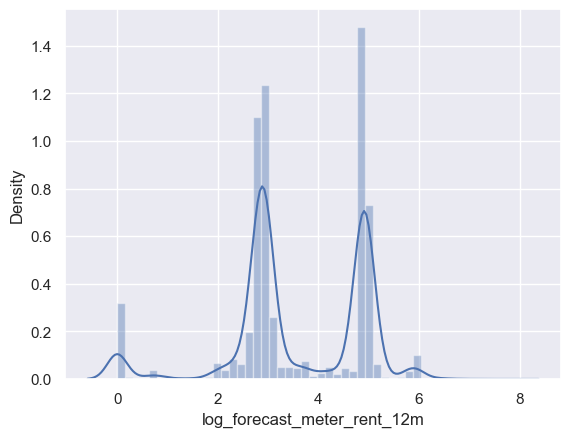

In [28]:
train.loc[train.forecast_meter_rent_12m<0,'forecast_meter_rent_12m']=np.nan
train['forecast_meter_rent_12m']=train['forecast_meter_rent_12m'].dropna()
train['log_forecast_meter_rent_12m']=train['forecast_meter_rent_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_meter_rent_12m'])

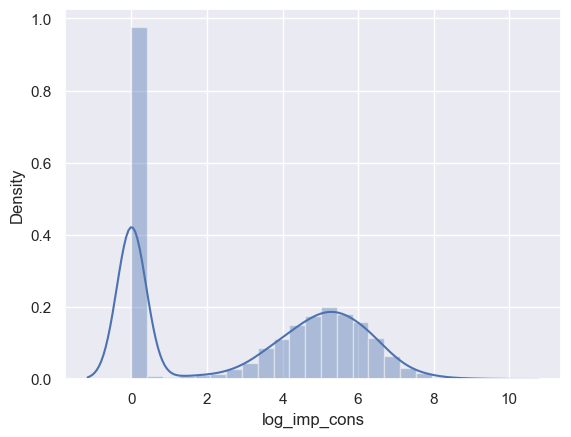

In [29]:
train.loc[train.imp_cons<0,'imp_cons']=np.nan
train['imp_cons']=train['imp_cons'].dropna()
train['log_imp_cons']=train['imp_cons'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_imp_cons']);

In [30]:
train=train.drop(['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons'],axis=1)
train.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,48ada52261e7cf58715202705a0451c9,0.0,0.095919,0.088347,58.995952,0,-41.76,-41.76,1,1732.36,3,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,0,1,0,0,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,3,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,0,0,1,0,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000
2,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,84,76,-7,76,4,0,0,0,0,0,0,0,0,1,0,0,0,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000
3,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,1,0,0,0,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000
4,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,1,0,0,0,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000


## High correlation variables

In [31]:
#Calculate correlation of variables
corr_hist=history_new.corr()

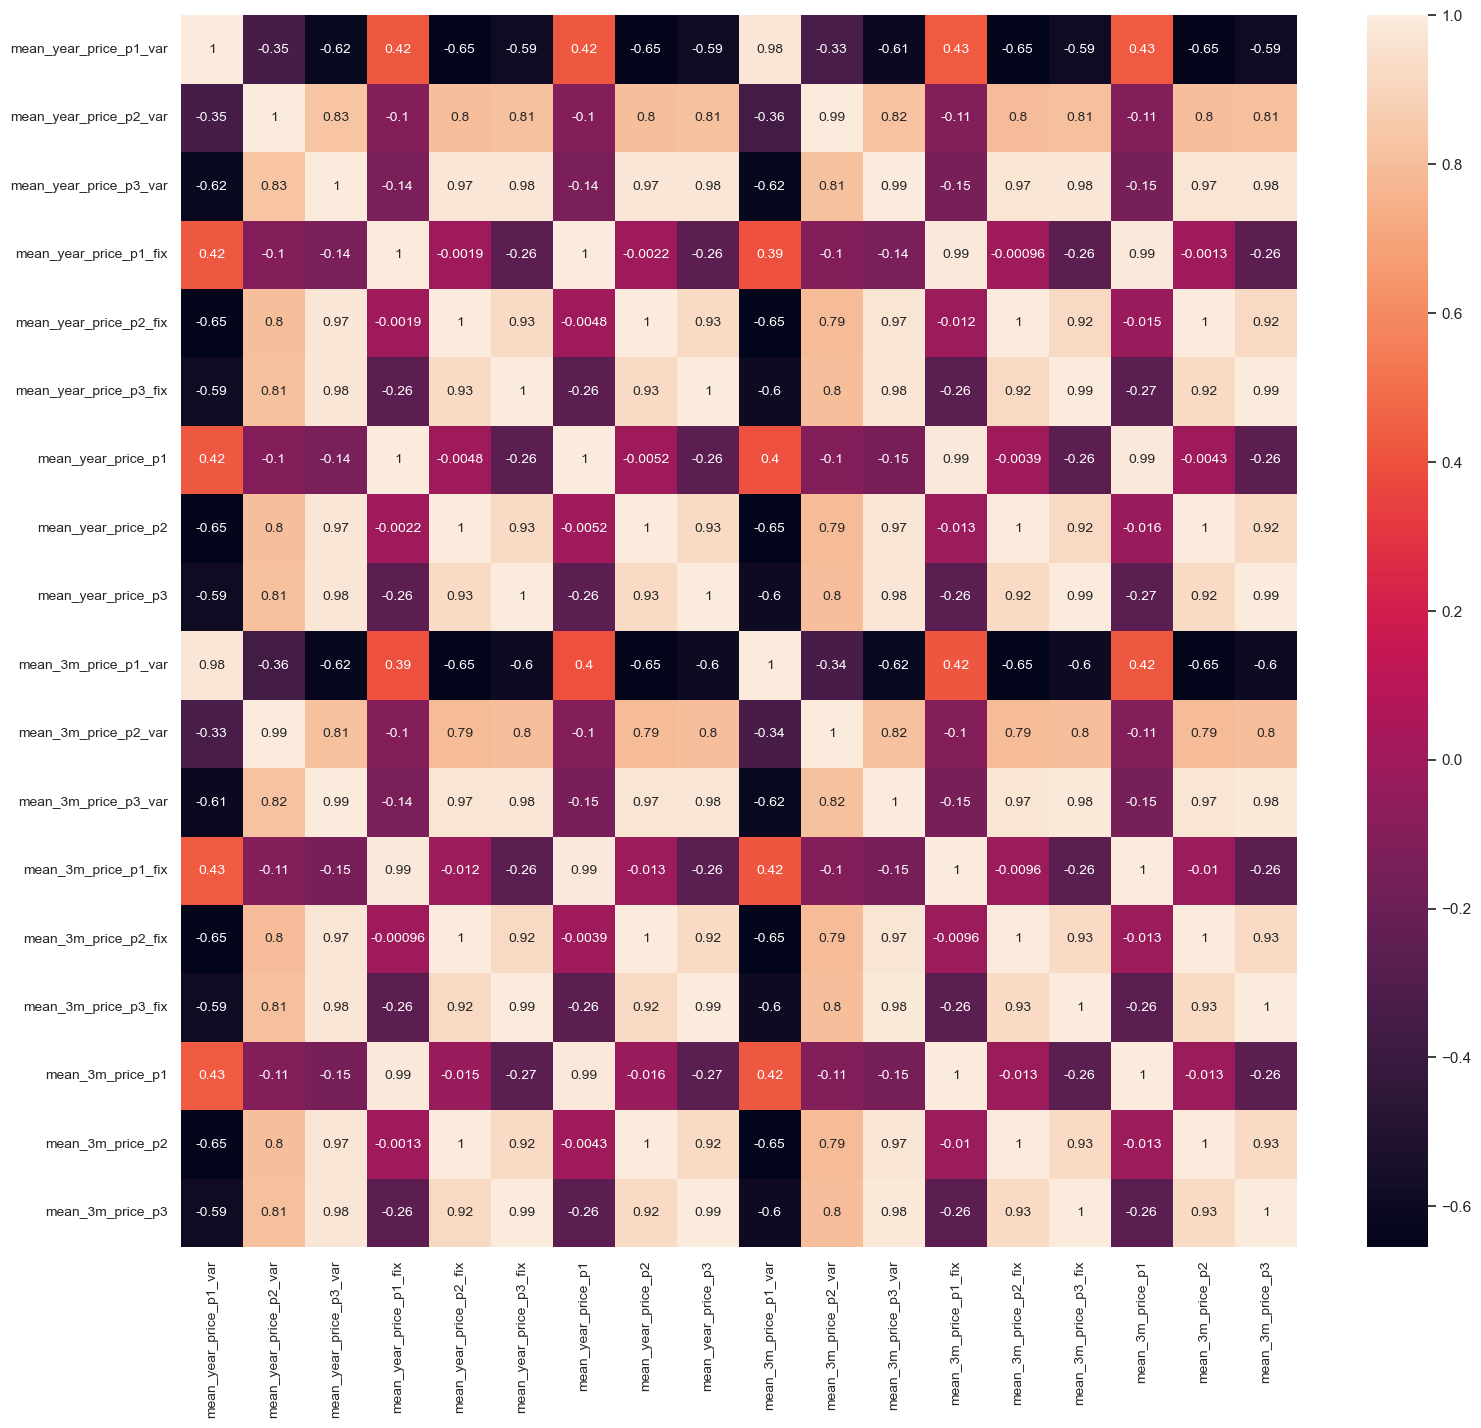

In [32]:
plt.figure(figsize=(18,16))
sns.heatmap(corr_hist,xticklabels=corr_hist.columns.values,
           yticklabels=corr_hist.columns.values,annot=True,annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [33]:
#Calculate correlation of variables
corr_train=train.corr()

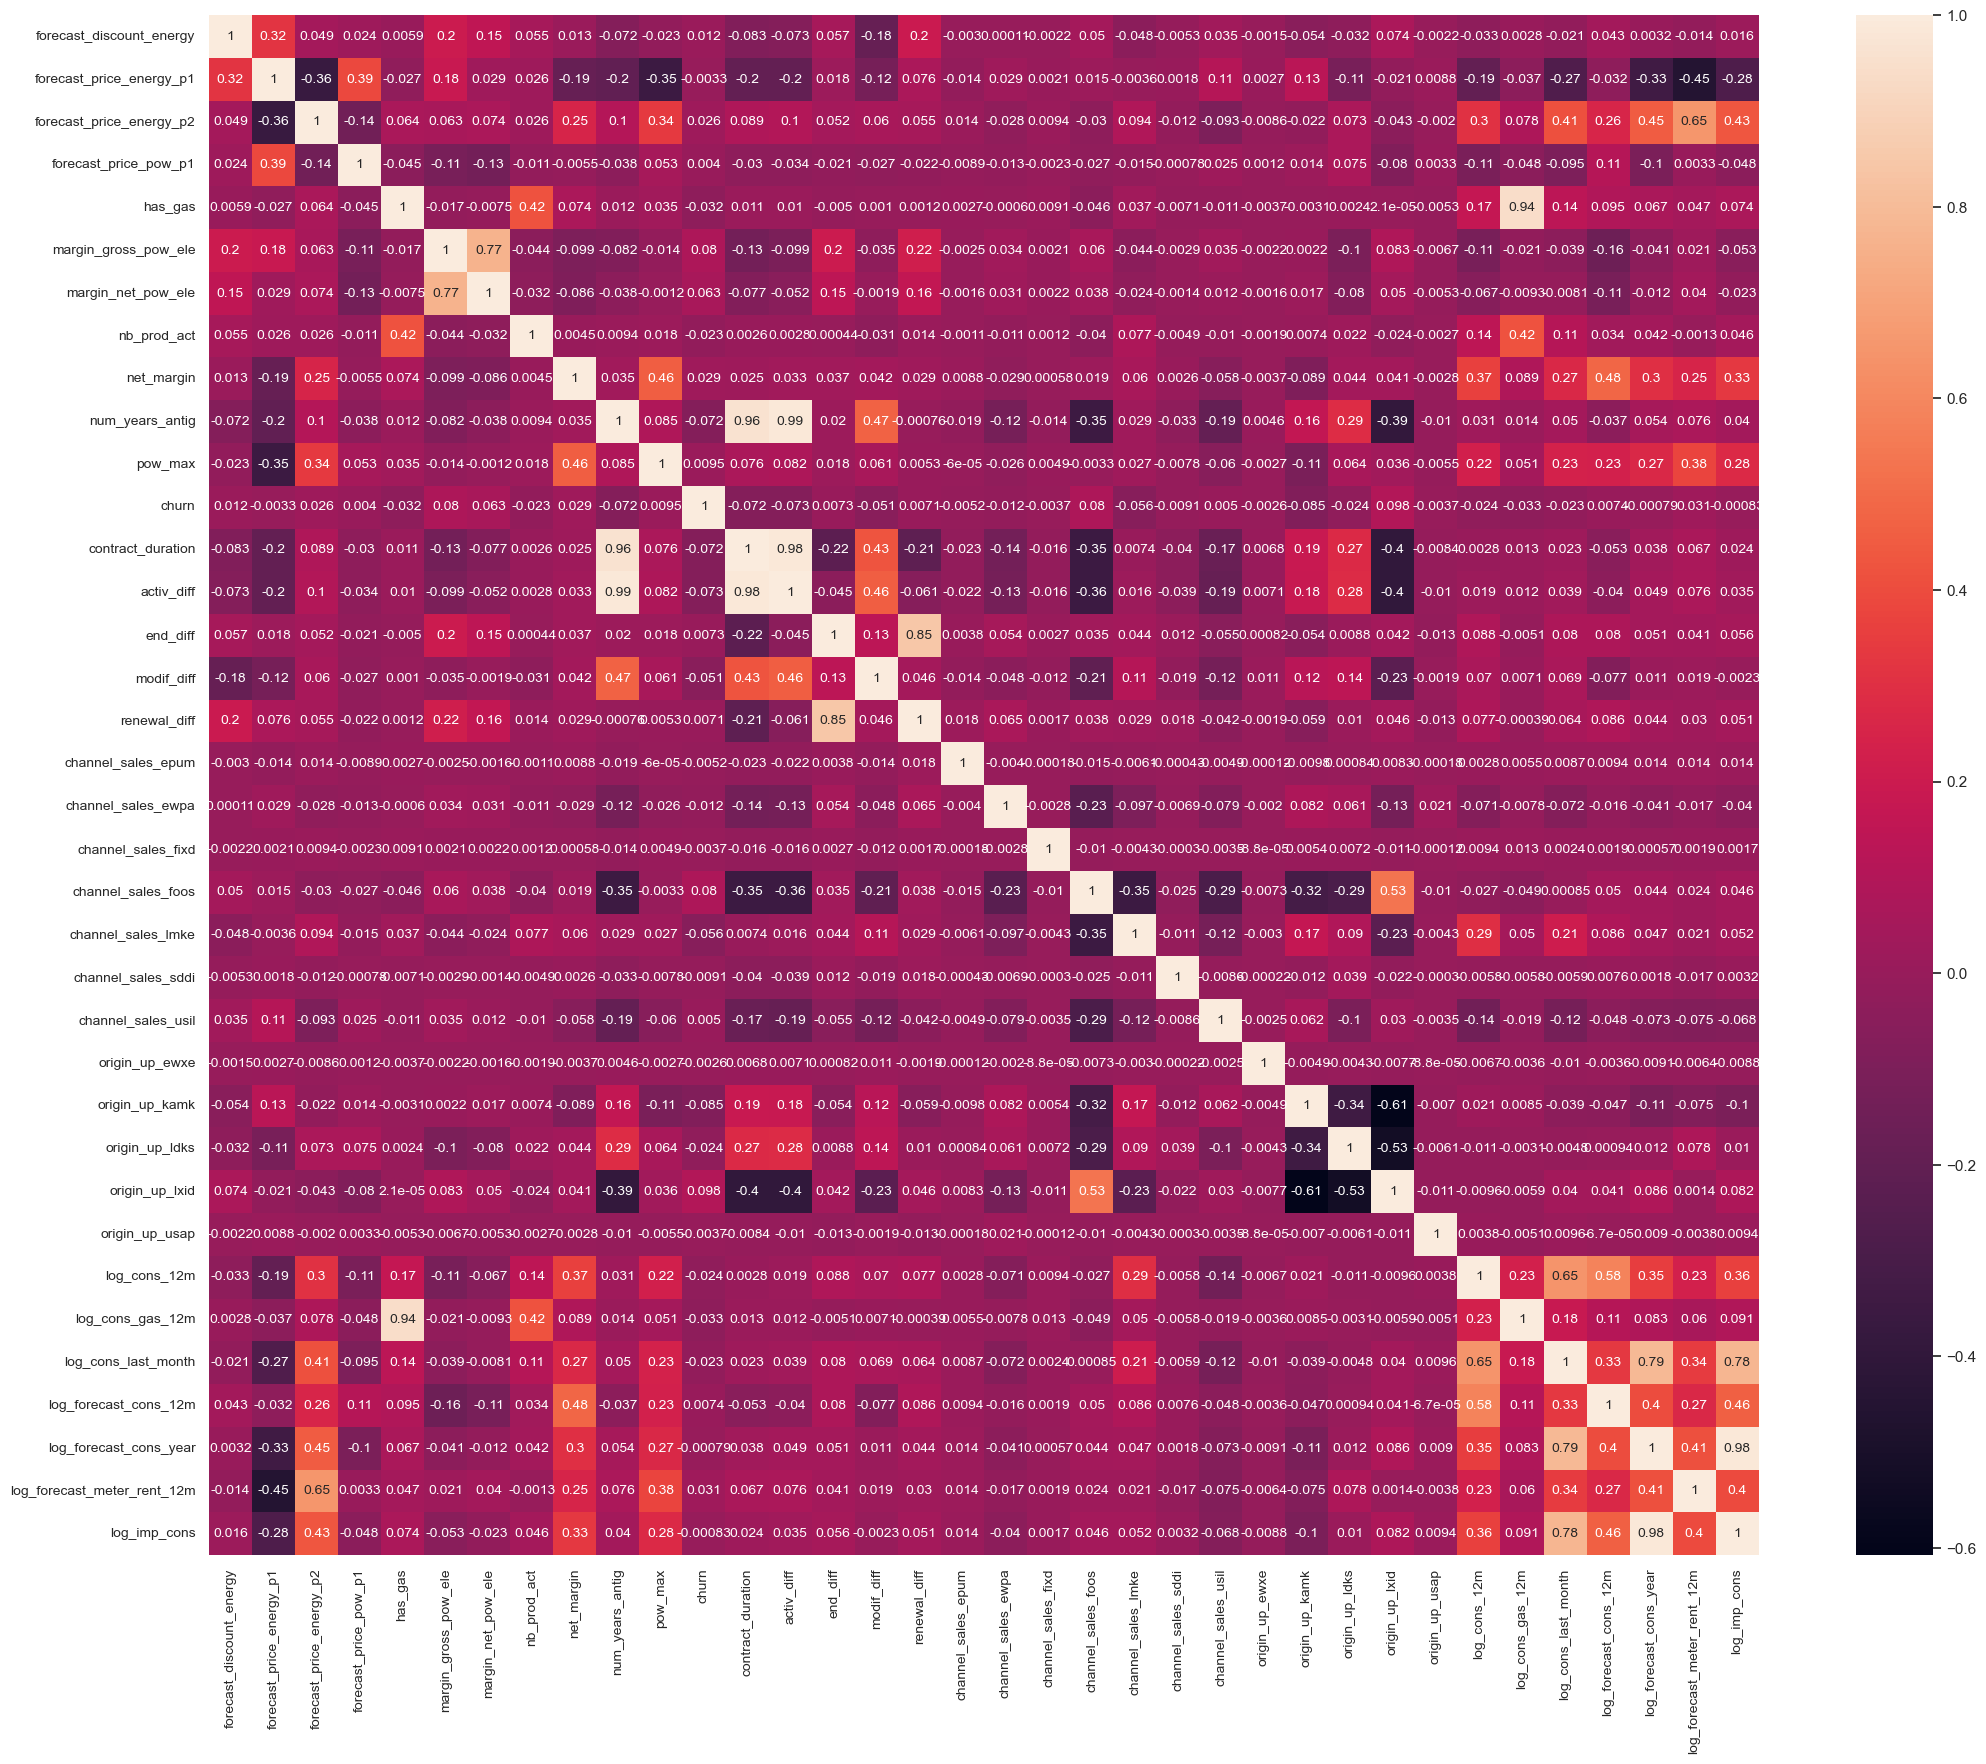

In [34]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_train,xticklabels=corr_train.columns.values,
           yticklabels=corr_train.columns.values,annot=True,annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As expected, **num_years_antig**  has a high correlation with **activ_diff**, we can remove the num_years_antig since they are provides the same information.

In [35]:
train.drop(columns=['num_years_antig'],inplace=True)


## Removing Outliers

As the previous EDA we can see that there have several outliers in the dataset,for simplisity, I will replace these outliers with the mean.


In [36]:
#I will use IQR method to detect outliers
def remove_outliers(df,col):
    df.loc[df[col]<0,col]=df[col].mean()
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+(iqr*1.5)
    lower_bound=q1-(iqr*1.5)
    df=df[(lower_bound<df[col])|(df[col]<upper_bound)]

In [37]:
remove_outliers(history_new,'mean_year_price_p1_var')
remove_outliers(history_new,'mean_year_price_p2_var')
remove_outliers(history_new,'mean_year_price_p3_var')
remove_outliers(history_new,'mean_year_price_p1_fix')
remove_outliers(history_new,'mean_year_price_p2_fix')
remove_outliers(history_new,'mean_year_price_p3_fix')
remove_outliers(history_new,'mean_year_price_p1')
remove_outliers(history_new,'mean_year_price_p2')
remove_outliers(history_new,'mean_year_price_p3')
remove_outliers(train,'log_cons_12m')
remove_outliers(train,'log_cons_gas_12m')
remove_outliers(train,'log_cons_last_month')
remove_outliers(train,'log_forecast_cons_12m')
remove_outliers(train,'log_forecast_meter_rent_12m')
remove_outliers(train,'log_forecast_cons_year')
remove_outliers(train,'log_imp_cons')
remove_outliers(train,'forecast_discount_energy')
remove_outliers(train,'forecast_price_energy_p1')
remove_outliers(train,'forecast_price_energy_p2')
remove_outliers(train,'forecast_price_pow_p1')
remove_outliers(train,'margin_gross_pow_ele')
remove_outliers(train,'margin_net_pow_ele')
remove_outliers(train,'net_margin')
remove_outliers(train,'pow_max')
remove_outliers(train,'forecast_price_energy_p1')

## Merge Data Together

In [38]:
df = pd.merge(train, history_new, on='id', how = 'left')
df.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,...,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,48ada52261e7cf58715202705a0451c9,0.0,0.095919,0.088347,58.995952,0,22.462276,21.460318,1,1732.36,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,...,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.099169,0.089992,0.066557,59.055124,36.417705,8.350997,59.154293,36.507697,8.417554
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.114481,0.098142,40.606701,1,25.440000,25.440000,2,678.99,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,...,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
2,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.380000,16.380000,1,18.89,13.800,0,84,76,-7,76,4,0,0,0,0,0,0,0,0,...,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000
3,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.600000,28.600000,1,6.60,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,...,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000
4,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.220000,30.220000,1,25.46,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,...,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000


In [39]:
df=df.drop('id', axis = 1)

In [40]:
#remove rows with any values that are not finite
df= df[np.isfinite(df).all(1)]

In [41]:
df

,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,...,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0.0,0.095919,0.088347,58.995952,0,22.462276,21.460318,1,1732.36,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,0,...,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.099169,0.089992,0.066557,59.055124,36.417705,8.350997,59.154293,36.507697,8.417554
1,0.0,0.114481,0.098142,40.606701,1,25.440000,25.440000,2,678.99,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,0,...,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
2,0.0,0.145711,0.000000,44.311378,0,16.380000,16.380000,1,18.89,13.800,0,84,76,-7,76,4,0,0,0,0,0,0,0,0,1,...,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000
3,0.0,0.165794,0.087899,44.311378,0,28.600000,28.600000,1,6.60,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,1,...,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000
4,0.0,0.146694,0.000000,44.311378,0,30.220000,30.220000,1,25.46,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,1,...,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,0.0,0.138305,0.000000,44.311378,1,27.880000,27.880000,2,381.77,15.000,0,47,43,-4,7,19,0,0,0,1,0,0,0,0,0,...,10.381924,10.777726,0.000000,8.444410,0.000000,2.973998,0.000000,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000
16092,0.0,0.100167,0.091892,58.995952,0,0.000000,0.000000,1,90.34,6.000,1,48,40,-7,40,4,0,0,0,1,0,0,0,0,0,...,8.885164,0.000000,5.204007,6.449981,5.204007,4.976941,2.829678,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721
16093,0.0,0.116900,0.100015,40.606701,0,39.840000,39.840000,1,20.38,15.935,1,47,46,-1,46,10,0,0,0,1,0,0,0,0,0,...,7.520235,0.000000,5.192957,5.254313,5.192957,4.872139,2.947067,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274
16094,0.0,0.145711,0.000000,44.311378,0,13.080000,13.080000,1,0.96,11.000,0,48,40,-7,40,4,0,0,0,1,0,0,0,0,0,...,4.882802,0.0000

Now we can see that our data is ready for modelleling.

## Modeling & Evaluation
### Sub-Task 2

Sub-Task 2:
- Build churn model(s) to try to predict the churn probability of any customer.
- Evaluate your model, using a holdout set, and with metrics of your choosing.

## Splitting data

In [42]:
#First we need to specify features and target 
y=df['churn']
X=df.drop('churn',axis=1)

In [43]:
#Check the binary target
y.value_counts()

0    14331
1     1528
Name: churn, dtype: int64

In [44]:
#Spliting dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


Base Models

We are going to quickly test the fit of 6 different models

- Logistic Regression: basic linear classifier (good to baseline)
- Random Forest: ensemble bagging classifier
- K-Nearest Neighbors: instance based classifier
- Support Vector Machines: maximum margin classifier
- Gaussian Naive Bayes: probabilistic classifier
- XGBoost: ensemble (extreme!) boosting classifier



In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs=[]
    models =[('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier ()),
        ('KNN', KNeighborsClassifier ()),
        ('SVM', SVC()), 
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier(eval_metric='mlogloss'))
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [66]:
run_exps(X_train,y_train,X_test,y_test)

LogReg
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2871
      benign       0.33      0.00      0.01       301

    accuracy                           0.90      3172
   macro avg       0.62      0.50      0.48      3172
weighted avg       0.85      0.90      0.86      3172

RF
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2871
      benign       0.91      0.07      0.12       301

    accuracy                           0.91      3172
   macro avg       0.91      0.53      0.54      3172
weighted avg       0.91      0.91      0.87      3172

KNN
              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95      2871
      benign       0.22      0.03      0.05       301

    accuracy                           0.90      3172
   macro avg       0.56      0.51      0.50      3172
weighted avg       0.84      0.90      0.86      3172

SVM
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.234133,0.059653,0.895193,0.801371,0.895193,0.845688,0.627651,LogReg
1,0.273801,0.010993,0.906619,0.868940,0.906619,0.862979,0.597383,LogReg
2,0.235150,0.011995,0.911313,0.831177,0.911313,0.869402,0.644963,LogReg
3,0.246740,0.010991,0.895546,0.804012,0.895546,0.847314,0.592044,LogReg
4,0.242101,0.010018,0.905400,0.844854,0.905400,0.861954,0.601051,LogReg
5,2.810316,0.177096,0.901891,0.902171,0.901891,0.862525,0.701129,RF
6,2.844715,0.124515,0.910559,0.896723,0.910559,0.874813,0.675804,RF
7,2.662695,0.117363,0.914466,0.902325,0.914466,0.878256,0.674386,RF
8,2.651794,0.153068,0.899882,0.893293,0.899882,0.856815,0.656348,RF
9,2.765030,0.112555,0.908159,0.886806,0.908159,0.869808,0.675927,RF


In [68]:
final=run_exps(X_train,y_train,X_test,y_test)
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model==model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

LogReg
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2871
      benign       0.33      0.00      0.01       301

    accuracy                           0.90      3172
   macro avg       0.62      0.50      0.48      3172
weighted avg       0.85      0.90      0.86      3172

RF
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2871
      benign       0.83      0.05      0.09       301

    accuracy                           0.91      3172
   macro avg       0.87      0.52      0.52      3172
weighted avg       0.90      0.91      0.87      3172

KNN
              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95      2871
      benign       0.22      0.03      0.05       301

    accuracy                           0.90      3172
   macro avg       0.56      0.51      0.50      3172
weighted avg       0.84      0.90      0.86      3172

SVM
 

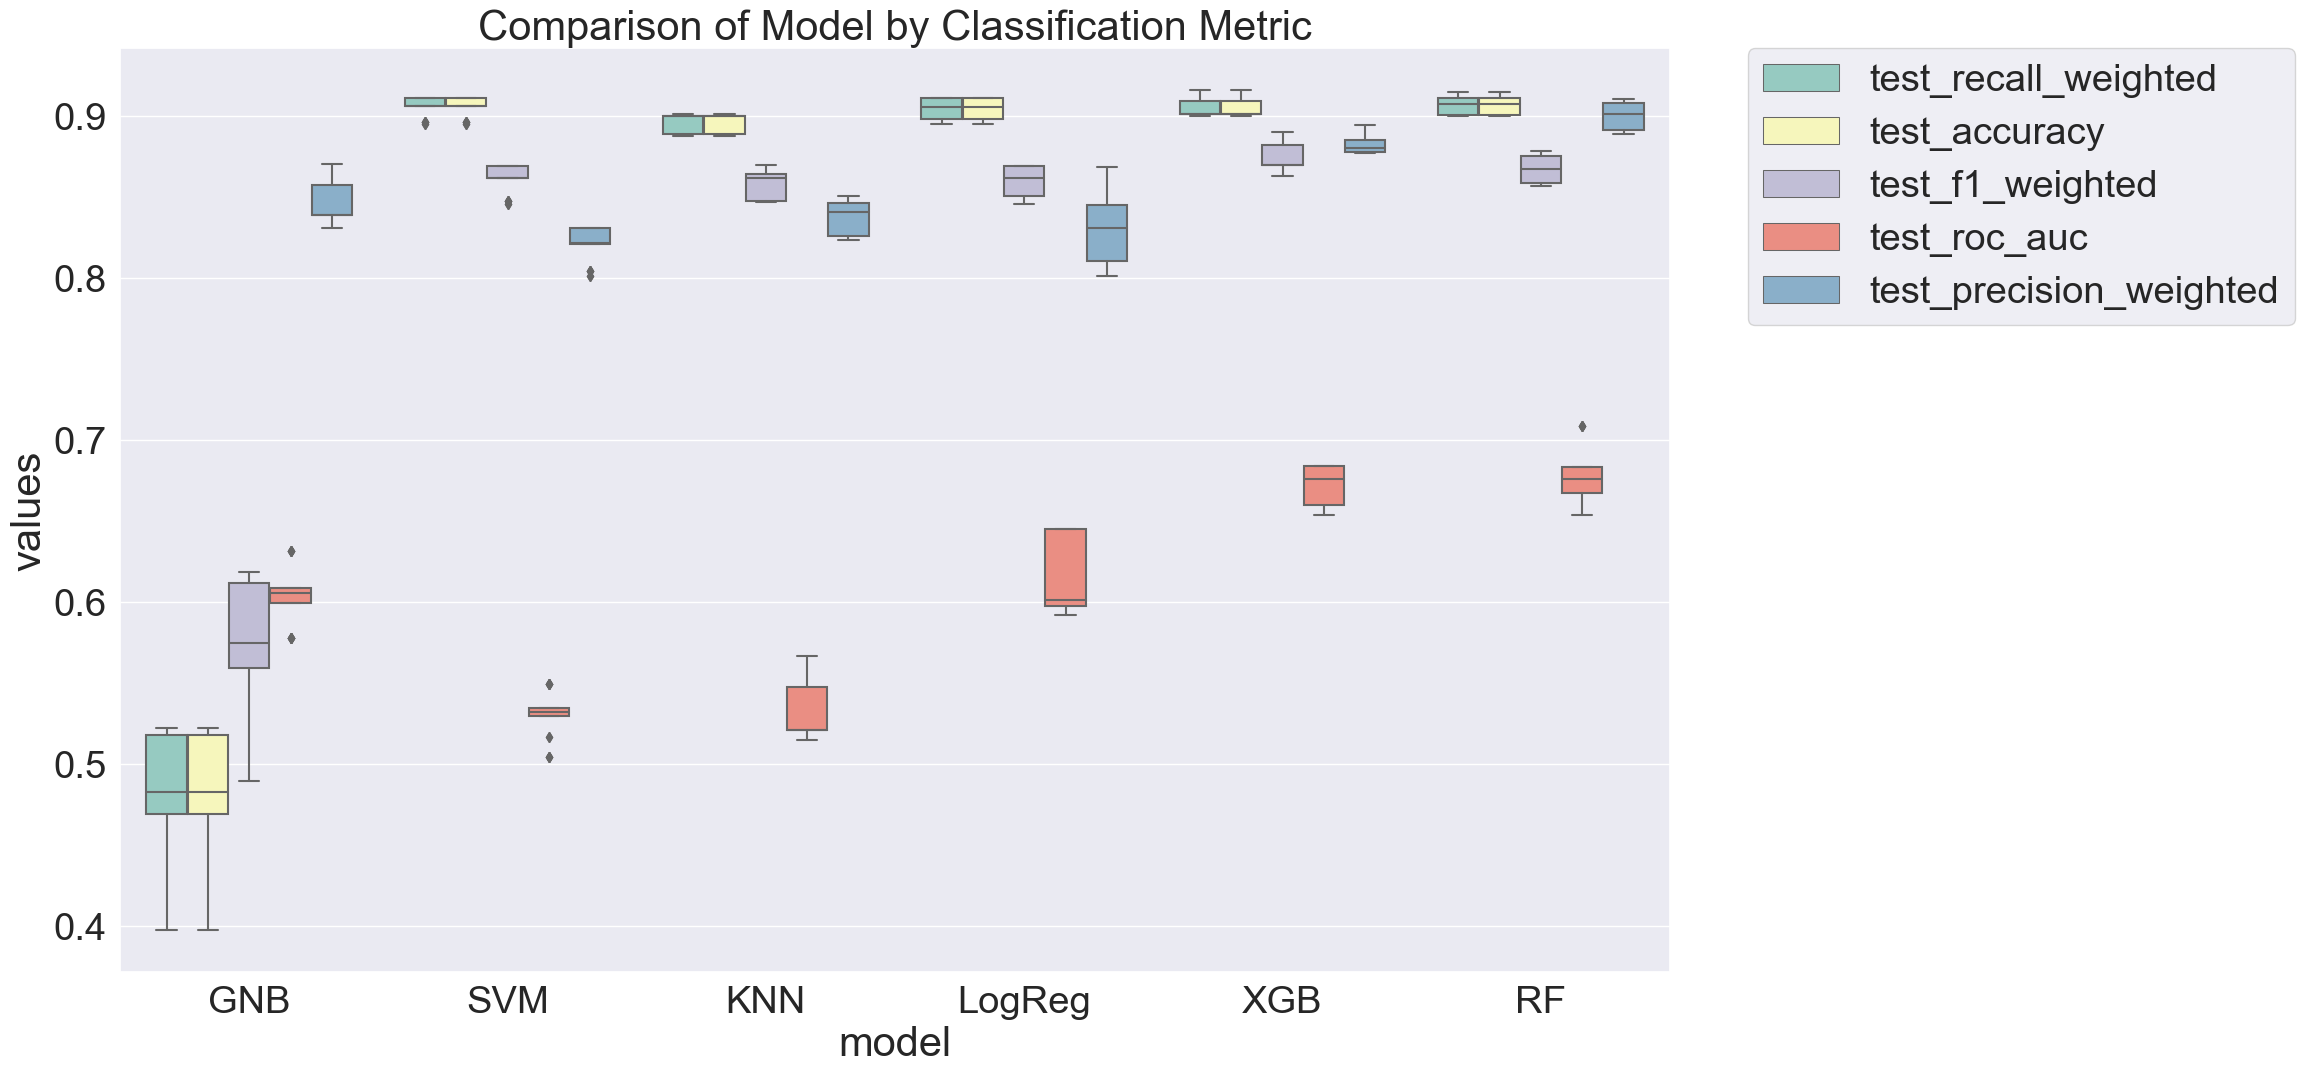

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

- It is clearly that GNBs fit our data poorly across alomast all the metrics, and the __XGBoost and Random Forest__ fit the data very well.

- Based on the analysis of six models, I will focus on the __XGBoost__ as continue refining model, not only because it has the best performing but also it has relativily fast train and score time.


### Model Finetuning

### Grid search with cross validation 

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid={'subsample':[0.7],
'scale_pos_weight':[1],
'n_estimators':[1100],
'min_child_weight':[1],
'max_depth':[12,13,14],
'learning_rate':[0.005,0.01],
'gamma':[4.0],
'colsample_bytree':[0.6]}


In [111]:
xg=xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

In [112]:
grid_search=GridSearchCV(estimator=xg,param_grid=param_grid,
                            cv=5,n_jobs= -1,verbose=2,scoring='roc_auc')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [113]:
best_grid=grid_search.best_params_
best_grid

{'colsample_bytree': 0.6,
 'gamma': 4.0,
 'learning_rate': 0.005,
 'max_depth': 14,
 'min_child_weight': 1,
 'n_estimators': 1100,
 'scale_pos_weight': 1,
 'subsample': 0.7}

In [121]:
model_grid=xgb.XGBClassifier(objective='binary:logistic',
                            nthread=1,eval_metric='mlogloss',**best_grid)
                              
fprs,tprs,score=[],[],[]

In [122]:
for (train,test), i in zip(cv.split(X,y),range(5)):
    model_grid.fit(X.iloc[train],y.iloc[train])
    _,_,auc_score_train=compute_roc_auc(model_grid,train)
    fpr,tpr,auc_score=compute_roc_auc(model_grid,test)
    score.append((auc_score_train,auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

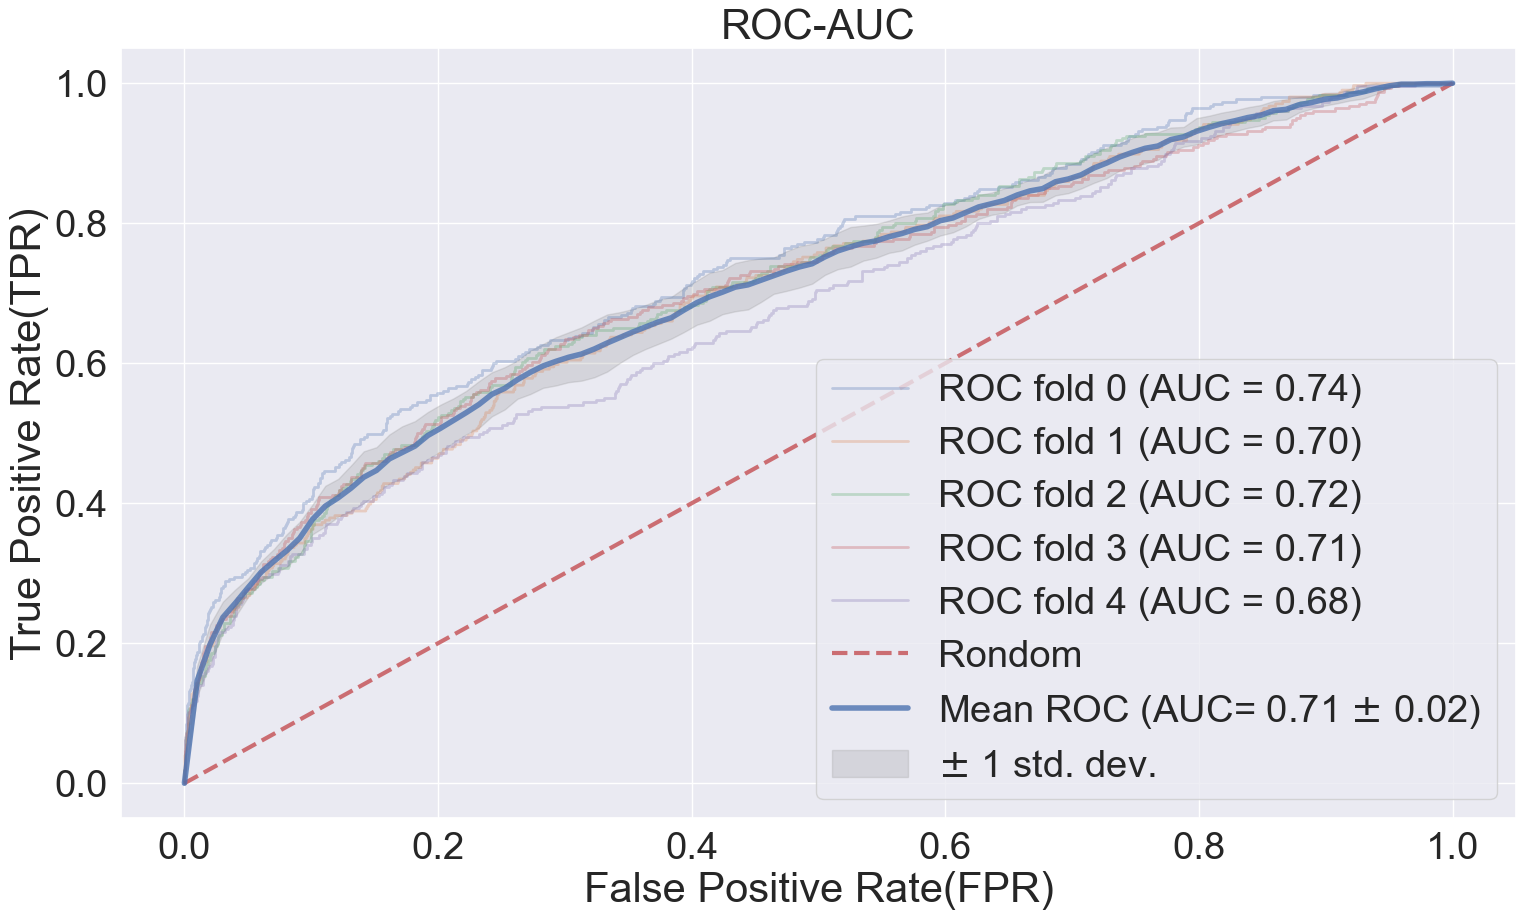

In [123]:
plot_roc_curve(fprs,tprs)
plt.show()

## Understanding the model

### Feature importance

One simple way of boserving the feature importance is through counting the number of times each feature is split on across all boosting rounds (trees)
in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear

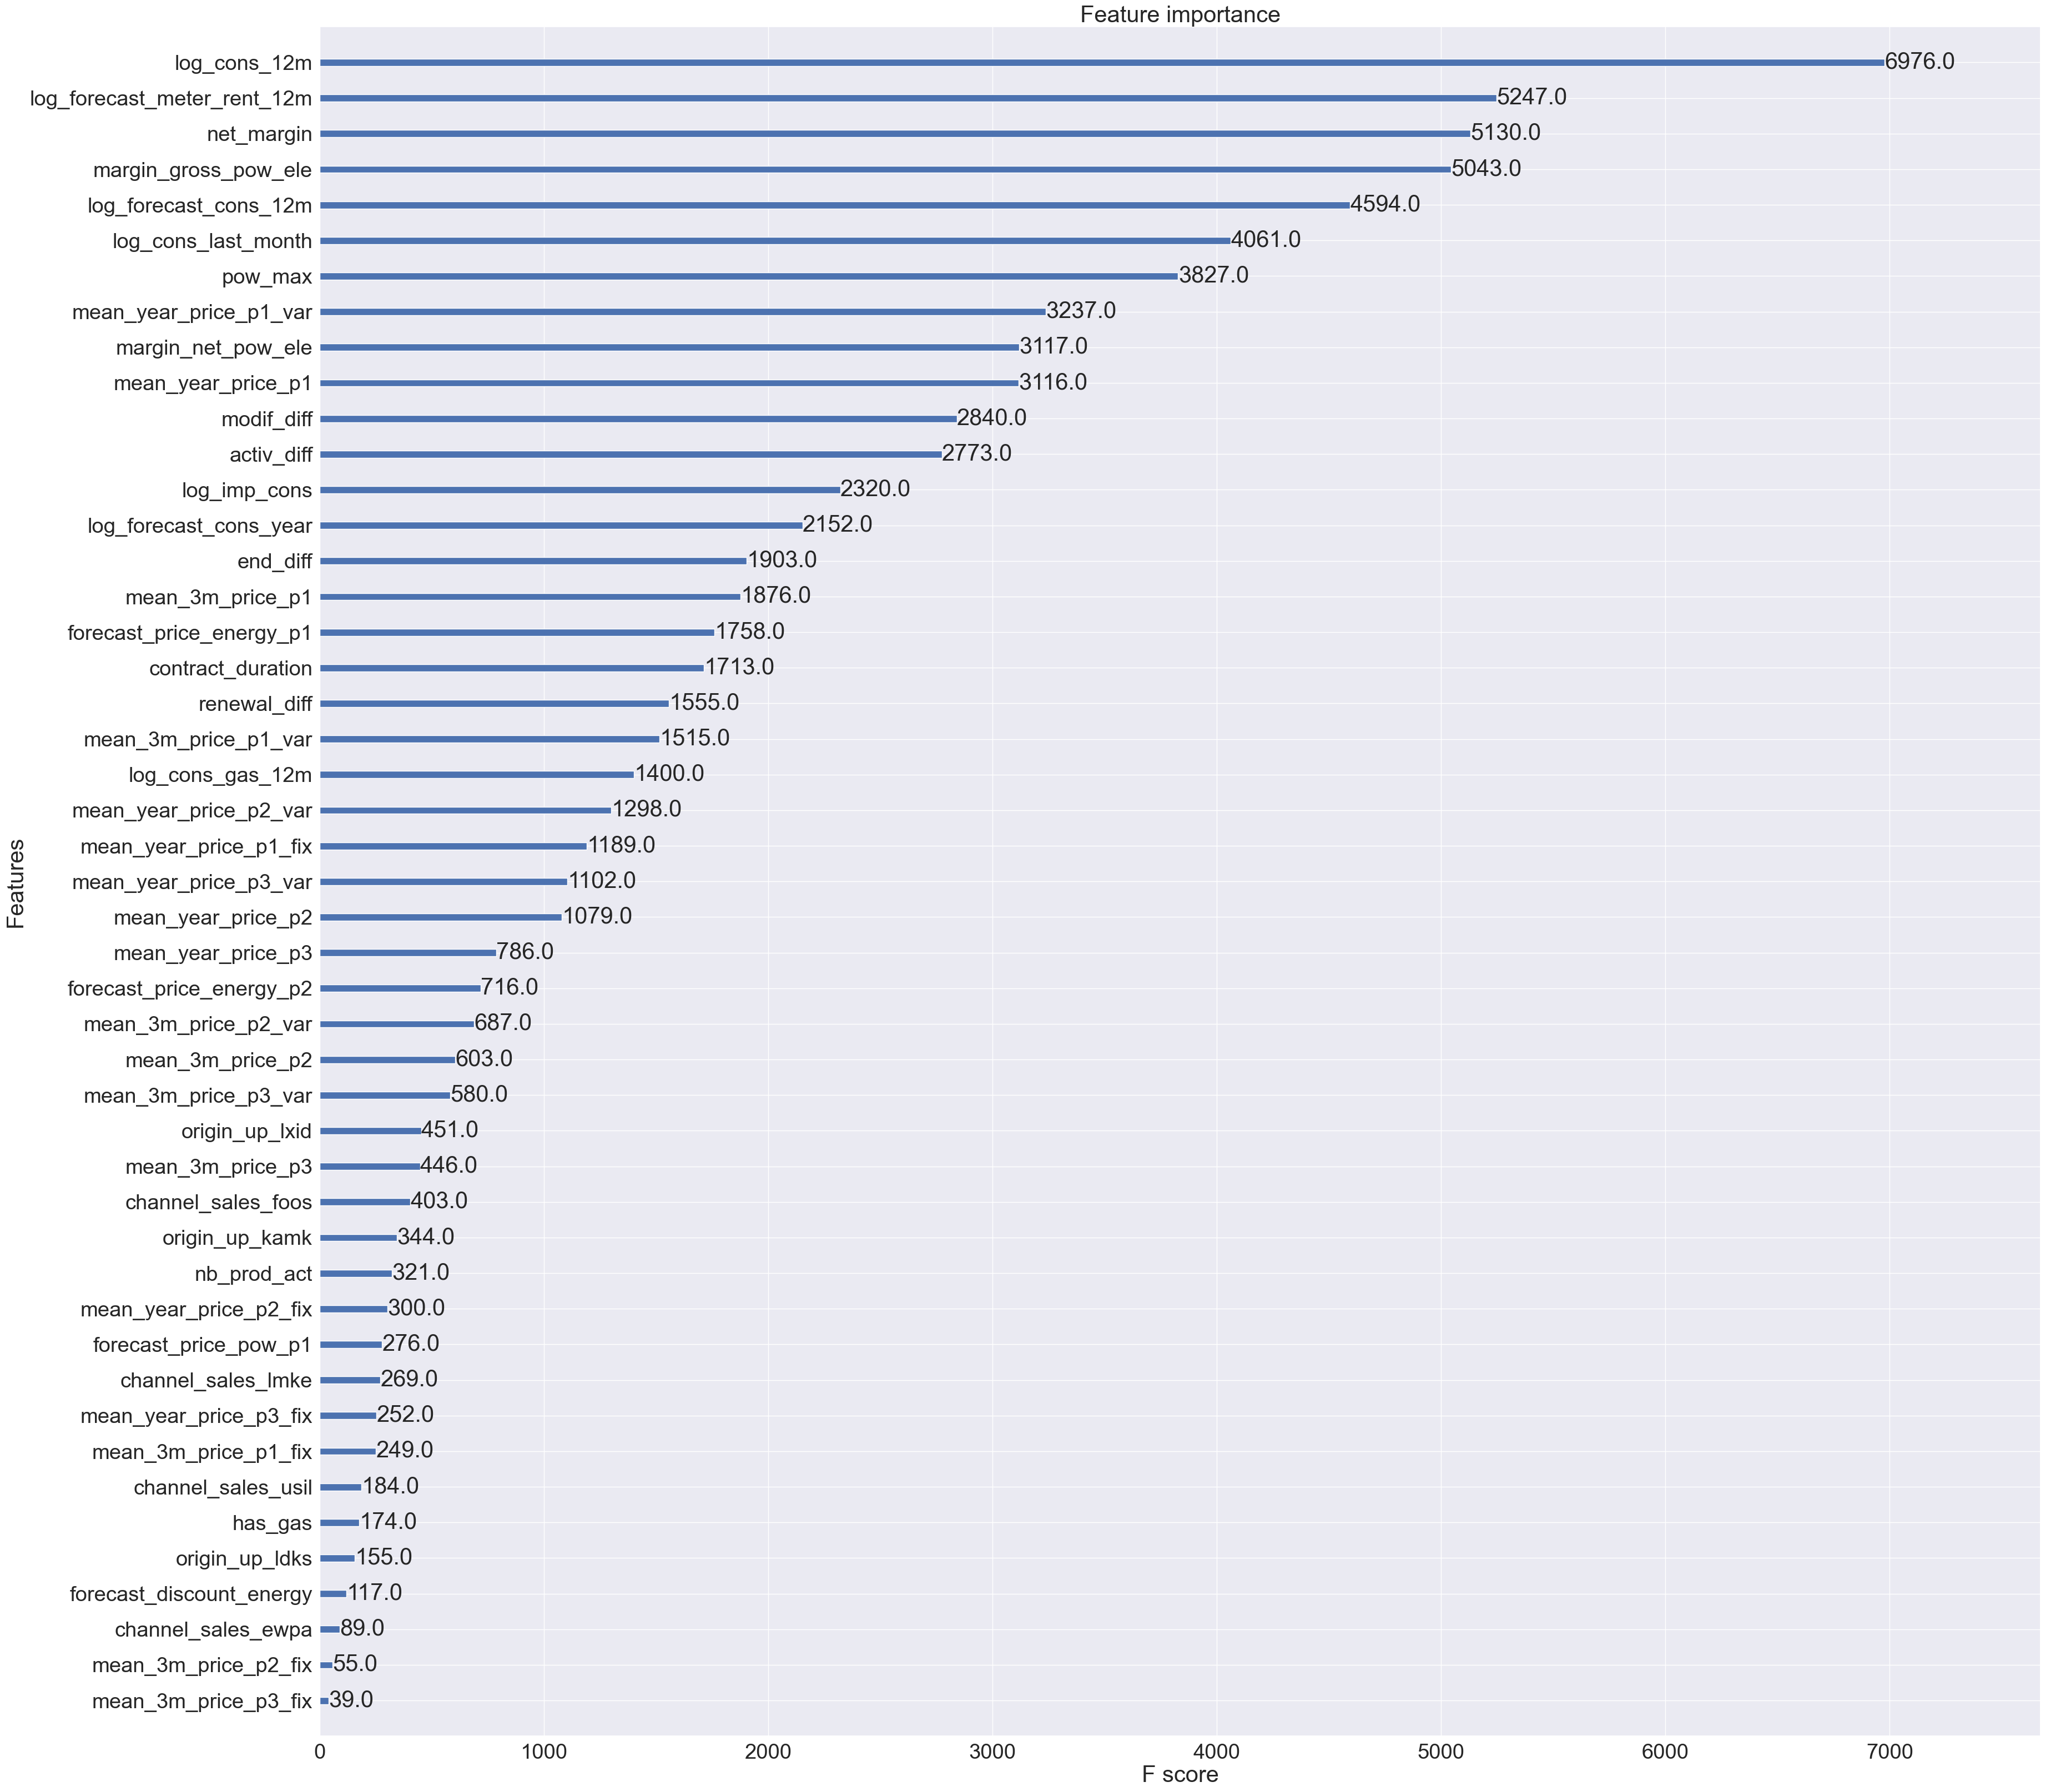

In [129]:
fig,ax=plt.subplots()
fig.set_size_inches(40, 40)
xgb.plot_importance(model_grid,ax=ax);


In the feature importance graph above we can see that cons_12m and net_margin are the features that appear the most in our model and
we could infere that these two features have a significant importnace in our model

## Partial dependence plot

In [134]:
from sklearn.inspection import plot_partial_dependence

Because currently there is a bug that does not allow us to use our trained model with pandas dataframes, we will create a replica and train it using
numpy arrays

In [135]:
# Create a model with the parameters found
model_grid_v2 = xgb.XGBClassifier(objective='binary:logistic',
silent=True, nthread=1, **best_grid)
model_grid_v2.fit(X_train.values,y_train.values)

[22:07:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.005, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=14, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1100, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', ...)

## SHAP - Feature importance

In [140]:
import shap
explainer = shap.TreeExplainer(model_grid)
shap_values = explainer.shap_values(X_test)

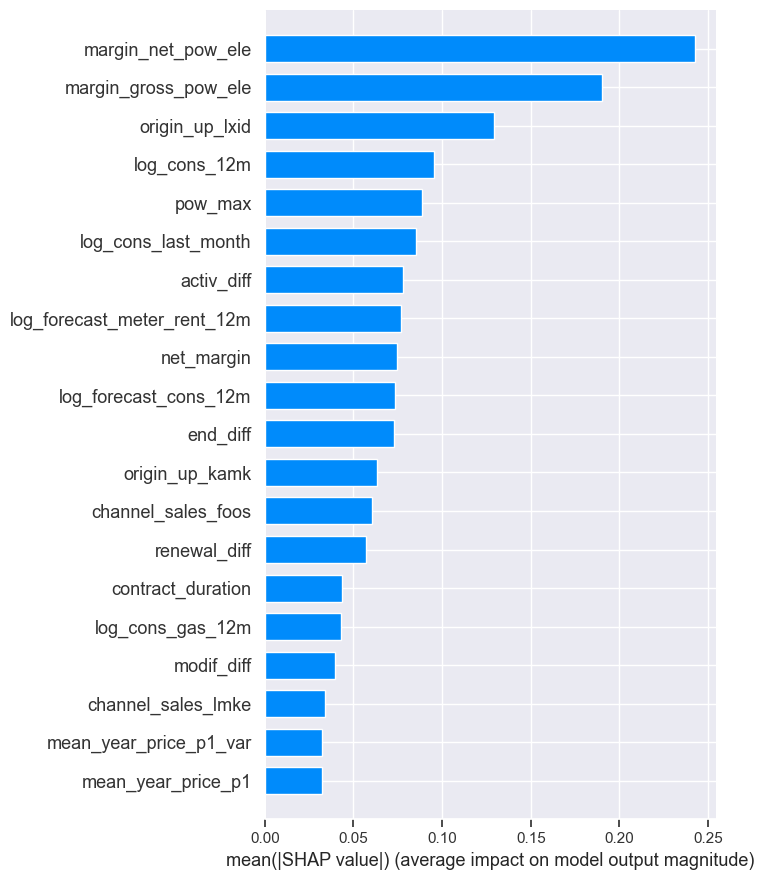

In [141]:
# Feature importance for class 1 - churn
shap.summary_plot(shap_values, X_test, plot_type='bar')

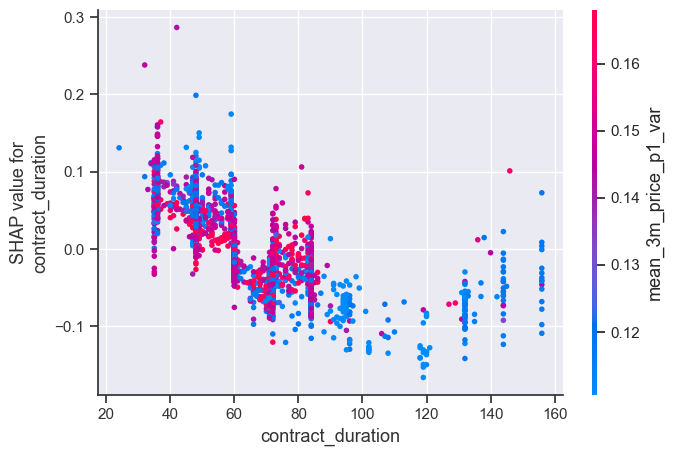

In [143]:
shap.dependence_plot("contract_duration", shap_values, X_test)#, interaction_index="origin_lxi")

In this case we see a much clearer pattern, in which the longer the tenure the less likely the company is, sort of decreasing linearly until it bottoms
around 9y of tenure. From year 10 of tenure, the churn increases again.

In the strategy suggested by the SME division head we offer a 20% discount to all customer targeted. However, this might not be optimal either. We assumed before that customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we'll need to try to:

Change the level of discount offered overall
Predict the response of customers to that discount (ie, the churn probability) based on how much that discount affects their prices, the revenue and margin.
Take care that we've applied the discount to all affected variables. To make this easier, we might want to retrain our model using a simpler set of variables where we know that we can factor the discount correctly into the predictors.
Find the discount level that balances customer retention vs the cost of false positives.
In fact, this could be turned into a 2D optimisation problem:

Objective: maximise net revenue (ie including the benefits of true positives and the cost of false positives)
Decision variables:
Level of discount offered, and
Fraction of people who are offered a discount
An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.